# Aplicações de Dados

Alunos: 

        Eduardo Junior de Almeida - 1311267
        Luciano Augusto Scherer Contri - 1500596
        Ricardo Romano Langaro - 197829
        Rodrigo Góis Santiago - 188982
        Winclatis Filipe Costa - 189227

Objetivo:
 
- Utilizar técnicas de NLP para análise de sentimentos em reviews de produtos da Amazon.
- treinar modelos de Machine Learning para classificar os produtos como bons ou ruins, baseado nas avaliações dos clientes.
- Avaliar a acurácia dos modelos de Machine Learning aplicados.



**Descrição da Base de Dados:**

| Campo             | Descrição                               |
|-------------------|-----------------------------------------|
| product_title     | Nome do Produto avaliado                |
| average_rating    | Média das Avaliações em Notas           |
| review_author     | Nome/Apelido do Usuário que realizou a Avaliação |
| review_rating     | Nota da Avaliação do Produto            |
| review_text       | Avaliação dos Clientes em Texto         |
| group_sequence    | Código do Produto / Grupo de Reviews    |

Dataset: amazon-customer-reviews-for-some-products (https://www.kaggle.com/datasets/mahran34/amazon-customer-reviews-for-some-products?resource=download)

Divisão do notebook seguindo a metodologia CRISP-DM:
- Preparação dos Dados
- Modelagem
- Avaliação
- Conclusão

## Preparação dos Dados

### Importação das Bibliotecas

In [1]:
import pandas as pd

In [2]:
df_review = pd.read_csv('../../Datasets/df_review.csv', sep = ',')
df_review

,product_title,average_rating,review_author,review_rating,review_text,group_sequence
0,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Karla Noble,1.0,I never ordered this item!,1
1,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Praj,3.0,The product is very good in terms of quality o...,1
2,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Marina Predeina,5.0,I love these headphones - those are cheap and ...,1
3,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Sabarina,3.0,No bass,1
4,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,mag 13,3.0,Mauvais son et pas de rÃ©glage du volume.Je su...,1
...,...,...,...,...,...,...
11454,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,Diego Galvez Martin,5.0,This is my second pair of earbuds from Tozo. I...,10
11455,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,LAB712,5.0,"Great sound quality, and noise cancellation. E...",10
11456,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,matthew kim,5.0,"works great, didn't want to bluetooth headsets...",10
11457,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,Gretchen Grindle,4.0,Great headphones!,10


### Limpando feature review_text

In [3]:
# quantidade de reviews unicos
print('Quantidade de reviews únicos:', df_review['review_text'].nunique())

# quantidade de reviews duplicados
print('Quantidade de reviews duplicados:', df_review.duplicated().sum())

# quantidade de reviews nulos
print('Quantidade de reviews nulos:', df_review['review_text'].isnull().sum())

# quantidade de reviews vazios  
print('Quantidade de reviews vazios:', df_review[df_review['review_text'] == ''].shape[0])


Quantidade de reviews únicos: 8212
Quantidade de reviews duplicados: 2971
Quantidade de reviews nulos: 11
Quantidade de reviews vazios: 0


In [4]:
# normalizar os textos para minúsculo e remover espaços em branco no início e no final  
df_review['review_text'] = df_review['review_text'].str.lower().str.strip()

# Remover duplicatas e valores nulos
df_review = (df_review.drop_duplicates()
                      .dropna(subset=['review_text']))


In [5]:
# mostrar dados duplicados  
df_review[df_review.duplicated(subset=['review_text'], keep=False)]

,product_title,average_rating,review_author,review_rating,review_text,group_sequence
57,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Bhargav,5.0,nice,1
61,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Sammee,5.0,great sound,1
105,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Mahendra Kumar. M,5.0,good,1
122,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Harish C. Manohar,5.0,good value,1
141,Amazon Basics In-Ear Wired Headphones Earbuds ...,4.2,Hari,5.0,ok,1
...,...,...,...,...,...,...
11398,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,Manny,5.0,great sound,10
11420,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,gil alisi,5.0,thanks,10
11437,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,Sal,5.0,good,10
11450,TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...,4.4,Bruce J.,5.0,they work great,10


### Classificar linguas com langdetect

Como podemos observar a nossa feature review_text é a que contém as avaliações dos clientes, e é a que será utilizada para a análise de sentimentos. No entanto, os textos se encontram em linguas diferentes, o que pode dificultar a análise. Para resolver isso, podemos traduzir os textos para inglês utilizando a biblioteca googletrans ou classificar as linguas e separar os textos por lingua. Para isso, utilizaremos a biblioteca langdetect.
Pois a biblioteca googletrans é uma API e tem um custo para traduzir os textos. além de demorar mais tempo para processar.

In [6]:
# usar langdetect para detectar a lingua dos textos
from langdetect import detect

# função para detectar a lingua dos textos
def detect_lang(text):
    try:
        return detect(text)
    except:
        return 'unknown'
# detectar a lingua dos textos
df_review['lang'] = df_review['review_text'].apply(detect_lang)

# mostrar a quantidade de textos por lingua
df_review['lang'].value_counts()

en    7287
es     350
af     101
it      97
ro      73
fr      70
so      59
pt      56
de      51
ca      48
sl      40
cy      33
et      30
da      30
pl      24
sk      21
no      20
sq      18
tl      16
nl      13
cs       7
sw       7
fi       7
hr       6
sv       5
tr       5
vi       3
hu       3
lv       2
Name: lang, dtype: int64

In [7]:
# drop textos que não estão em inglês
df_review = df_review[df_review['lang'] == 'en']

Reduzimos de 8000 unicos para 7000 unicos após a remoção dos textos que não estão em inglês. Infelizmente é custoso usar APIs para traduzir como google cloud translation. Mas continua boa a quantidade de dados para treinar os modelos.

Agora como os ratings vão de 1 a 5, vamos considerar que ratings 1 e 2 são negativo, 3 é neutro e 4 e 5 são positivo. Vamos criar uma nova coluna target. 

In [8]:
# criar a coluna Target
df_review['target'] = df_review['review_rating'].apply(lambda x: 'neg' if x <= 3 else 'pos')

In [9]:
# salvar o dataframe
df_review.to_csv('df_review_clean.csv', index=False)

In [ ]:
train = pd.read_csv('../../Datasets/Amazon Reviews/train.csv', sep = ',', header= None)

In [7]:
train.columns = ['rating', 'review_title', 'review_text']
train

,rating,review_title,review_text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [ ]:
test = pd.read_csv('../../Datasets/Amazon Reviews/test.csv', sep = ',', header = None)

In [6]:
test.columns = ['rating', 'review_title', 'review_text'] 
test

,rating,review_title,review_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


## Modelagem

Nessa etapa, vamos treinar modelos de Machine Learning tradicionais e modelos de Deep Learning para classificar os produtos como bons ou ruins, baseado nas avaliações dos clientes. Visa-se avaliar a acurácia dos modelos aplicados e comparar os resultados.

### tokenização e remoção de stopwords de textos em inglês

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import unidecode
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Função para preprocessar texto
def preprocess_text_traditional(text):
    # Inicializar lematizador
    lemmatizer = WordNetLemmatizer()
    
    text = unidecode.unidecode(text) # Remover acentos   
    text = text.lower() # Converter para minúsculas    
    text = text.translate(str.maketrans('', '', string.punctuation))# Remover pontuação    
    words = word_tokenize(text)# Tokenizar    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]# Remover stopwords    
    words = [lemmatizer.lemmatize(word) for word in words]# Lematizar   
    return ' '.join(words) # Juntar tokens de volta em uma string para modelos tradicionais

X_text = df_review['review_text'].apply(lambda x: preprocess_text_traditional(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lucia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Modelos de Machine Learning Tradicionais

Função para treinar modelos tradicionais, salvar avaliações e salvar modelo 

In [11]:
import joblib
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# função para treinar modelo tradicionais, salvar avaliações e salvar modelo 
def train_model(df, model_type, X_text):
    
    # Preprocessar texto
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X_text)

    # Codificar o target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['target'])
    
    # Dividir dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicializar modelos
    model = model_type
    model.fit(X_train, y_train)
    
    # Prever valores    
    y_pred = model.predict(X_test)
    
    # Avaliar modelo    
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # salvar modelo
    joblib.dump(model, f'{model_type}.pkl')
    
    return report, accuracy

Treinamento e avaliação dos modelos tradicionais    

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Inicializar modelos
logistic = LogisticRegression() 
random_forest = RandomForestClassifier()    
svc = SVC()
naive_bayes = MultinomialNB()

# Treinar modelos
report_logistic, accuracy_logistic = train_model(df_review, logistic, X_text)
report_random_forest, accuracy_random_forest = train_model(df_review, random_forest, X_text)
report_svc, accuracy_svc = train_model(df_review, svc, X_text)
report_naive_bayes, accuracy_naive_bayes = train_model(df_review, naive_bayes, X_text)


In [13]:

print('Logistic Regression')
print('Accuracy:', accuracy_logistic)
print(report_logistic)
print('-'*50)

print('Random Forest')
print('Accuracy:', accuracy_random_forest)
print(report_random_forest)
print('-'*50)

print('SVC')
print('Accuracy:', accuracy_svc)
print(report_svc)
print('-'*50)

print('Naive Bayes')
print('Accuracy:', accuracy_naive_bayes)    
print(report_naive_bayes)


Logistic Regression
Accuracy: 0.8477366255144033
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       478
           1       0.87      0.91      0.89       980

    accuracy                           0.85      1458
   macro avg       0.83      0.82      0.82      1458
weighted avg       0.85      0.85      0.85      1458

--------------------------------------------------
Random Forest
Accuracy: 0.8587105624142661
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       478
           1       0.86      0.94      0.90       980

    accuracy                           0.86      1458
   macro avg       0.85      0.82      0.83      1458
weighted avg       0.86      0.86      0.85      1458

--------------------------------------------------
SVC
Accuracy: 0.8443072702331962
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       478
          

### Modelos de Deep Learning

#### LSTM

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from functools import partial

from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
import tensorflow as tf     

import numpy as np

import scikeras


##### Tokenização e Padronização para LSTM  

In [15]:
# Inicializar tokenizador específico para LSTM
tokenizer_lstm = Tokenizer(num_words=5000)

# Tokenização e Padronização
tokenizer_lstm.fit_on_texts(X_text)
vocab_size = len(tokenizer_lstm.word_index) + 1
print('Vocab Size:', vocab_size)
X = tokenizer_lstm.texts_to_sequences(X_text)
X = pad_sequences(X, maxlen=100)

# Encode target labels to one-hot
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_review['target'])
y = tf.keras.utils.to_categorical(y, num_classes=2)  # Convert to one-hot encoding

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vocab Size: 11243


##### Função para criar modelo LSTM 

In [16]:
# Função para criar modelo LSTM
def create_model(dropout_rate= 0.5, LSTM_layers= 1, LSTM_neurons= 64, dense_layers= 1, dense_neurons= 32, activation= 'relu'):
    try:
        
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=128))
        
        
        if LSTM_layers == 3:
            model.add(Bidirectional(LSTM(LSTM_neurons, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
            model.add(BatchNormalization())
            model.add(Bidirectional(LSTM(LSTM_neurons, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
            model.add(BatchNormalization())
        
        if LSTM_layers == 2:
            model.add(Bidirectional(LSTM(LSTM_neurons, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
            model.add(BatchNormalization())
            
        
        model.add(Bidirectional(LSTM(LSTM_neurons, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=False)))
        model.add(BatchNormalization())
        
        for _ in range(dense_layers-1):
            model.add(Dense(dense_neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
            model.add(BatchNormalization())
            model.add(Dropout(dropout_rate))
        
        model.add(Dense(dense_neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))  # Adjusted this line
        
        return model
    except Exception as e:
        print(f"An error occurred while adding layers: {e}")
        return None

##### Random Search com 50 iterações

In [17]:

# 
# # Define the hyperparameters to tune and their possible values
# param_grid = {
#     'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
#     'LSTM_layers': [1, 2, 3],
#     'LSTM_neurons': [32, 64, 128],
#     'dense_layers': [1, 2, 3],
#     'dense_neurons': [32, 64, 128],
#     'activation': ['relu', 'leaky_relu', 'elu'],
#     'optimizer': [Adam, SGD, RMSprop, Adagrad],
#     'learning_rate': [0.001, 0.01, 0.005],
#     'batch_size': [16, 32, 64, 128],
#     'epochs': [10]
# }
# 
# # Define the number of iterations for the random search
# n_iter = 50
# 
# best_score = 0
# best_params = {}
# best_report = None
# 
# for i in range(n_iter):
#     # Randomly sample parameters for this round
#     params = {k: np.random.choice(v) for k, v in param_grid.items()}
# 
#     # Create a new model with the sampled parameters
#     model = create_model(dropout_rate=params['dropout_rate'],
#                          LSTM_layers=params['LSTM_layers'],
#                          LSTM_neurons=params['LSTM_neurons'],
#                          dense_layers=params['dense_layers'],
#                          dense_neurons=params['dense_neurons'],
#                          activation=params['activation'])
# 
#     if params['optimizer'] == Adam: 
#         optimizer = Adam(learning_rate=params['learning_rate']) 
#     elif params['optimizer'] == RMSprop:
#         optimizer = RMSprop(learning_rate=params['learning_rate'])  
#     elif params['optimizer'] == Adagrad:
#         optimizer = Adagrad(learning_rate=params['learning_rate'])
#     else:
#         optimizer = SGD(learning_rate=params['learning_rate'])
#         
# 
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# 
#     # Define callbacks
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=2, min_lr=0.0001)
#     
#     print(f'Iteration {i+1}/{n_iter}')
#     print(f'Parameters: {params}')
#     # Train the model
#     model.fit(X_train, 
#               y_train, 
#               epochs=params['epochs'], 
#               batch_size=params['batch_size'],
#               validation_data=(X_test, y_test),
#               verbose=2, 
#               callbacks=[early_stopping, reduce_lr])
# 
#     # Evaluate the model
#     y_pred = np.argmax(model.predict(X_test), axis=-1)
#     y_test_binary = np.argmax(y_test, axis=-1)  # Convert y_test to binary format
#     score = accuracy_score(y_test_binary, y_pred)  # Use y_test_binary here
#     # classification report
#     report_lstm = classification_report(y_test_binary, y_pred, zero_division= 0)  # Use y_test_binary here
#     print('Accuracy:', score)
#     print(report_lstm)
#     
# 
#     # If the score for this model is better than our current best, update the best score and best parameters
#     if score > best_score:
#         best_score = score
#         best_params = params
#         best_report = report_lstm
# 
# # Print the best score and the parameters that produced it
# print('Best score:', best_score)
# print('Best parameters:', best_params)

50 iterações de uma random search com diferentes configurações de parametros e layers nos resultou em um modelo com:

- Best score: 0.8689087165408373
- Best parameters: {'dropout_rate': 0.5, 'LSTM_layers': 2, 'LSTM_neurons': 64, 'dense_layers': 1, 'dense_neurons': 32, 'activation': 'relu', 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10}

##### Custom Callback   

Criamos um custom callback para monitorar o treinamento do modelo e salvar os melhores pesos. De forma que eu posso escolher quantas épocas esperar para reduzir o learning rate e quantas épocas esperar para restaurar os melhores pesos. Então Criei uma Rotina dessa forma:

- Se o modelo não melhorar por um número de épocas (patience) ele restaura os melhores pesos.
- Se o modelo não melhorar por um número de épocas (lr_patience) ele reduz o learning rate. 
- Se o learning rate chegar no mínimo, ele para o treinamento.  

Dessa forma a estrutura deixa o modelo re-testar o learning_rate no melhor ponto de mínimo local, e não deixa o modelo divagar.
se mesmo assim aquele learning_rate não funcionar, ele vai diminuindo até chegar no mínimo e parar o treinamento. 

Também criei outra rotina onde ela:
- salva os pesos e os resultados de 3 épocas que rodam com os mesmo pesos
- compara se uma dessas 3 épocas melhorou o modelo.
- Se Melhorou atualiza os pesos
- Se piorou, ele reduz o learning rate e realiza mais 3 épocas
- Se o learning_rate chegar no mínimo encerra-se o treinamento.

Infelizmente o Callback ReduceLROnPlateau não funciona dessa forma, ele reduz o learning rate mas ele aplica nos pesos atuais que podem ter divagado muito longe, e não nos melhores pesos. então por exemplo, se com o learning rate de 0.01 o modelo piorar significativamente no periodo de pacience, ele reduzirá o learning rate para 0.004, mas continuará treinando com os pesos atuais que pioraram o modelo e estão em um minimo local pior. Por exemplo: ele no inicio do treinamento encontrou um mínimo local de val_loss de 0.4 7 epócas dentro do treinamento, mas nas outras interações ele divagou para 0.55, o ReduceLROnPlateau vai reduzir o learning rate para 0.001 mas o modelo vai continuar do local val_loss de 0.55 e com um learning_rate menor dificilmente irá achar um mínimo local melhor.

In [61]:
from tensorflow.keras.callbacks import Callback
import numpy as np

class CustomCallback(Callback):
    def __init__(self, patience=0, lr_patience=3, reduce_factor=0.5, min_lr=0.0001):
        super(CustomCallback, self).__init__()
        self.patience = patience
        self.lr_patience = lr_patience 
        self.wait = 0
        self.lr_wait = 0
        self.best_weights = None
        self.best_loss = np.inf
        self.reduce_factor = reduce_factor
        self.min_lr = min_lr
        self.best_epoch = 0
        self.results = []
        self.weights = []

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.lr_wait = 0
        self.best_weights = None
        self.best_loss = np.inf
        self.results = []
        self.weights = []

    def on_epoch_begin(self, epoch, logs=None):
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        print("\nLearning rate is %6.4f." % (lr))
        print(f"Epoch {epoch}:")
        # print("current wait count:", self.wait)
        print("best loss:", self.best_loss)
        print("current loss:", logs.get("val_loss"))
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)
    
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get("val_loss")
        self.results.append(current_loss)
        self.weights.append(self.model.get_weights())
        if self.best_weights is None:
            self.best_weights = self.model.get_weights()  
        if len(self.results) == 3:
            min_loss_index = np.argmin(self.results)
            min_loss = self.results[min_loss_index]
            if min_loss < self.best_loss:
                self.best_loss = min_loss
                self.best_weights = self.weights[min_loss_index]
            else:
                old_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
                new_lr = old_lr * self.reduce_factor
                new_lr = max(new_lr, self.min_lr)
                if new_lr == self.min_lr:
                    self.model.stop_training = True
                self.model.optimizer.learning_rate = tf.Variable(new_lr)
            self.results = []
            self.weights = []
    
    # def on_epoch_end(self, epoch, logs=None):
    #     current_loss = logs.get("val_loss")
    #     if np.less(current_loss, self.best_loss):
    #         self.best_loss = current_loss
    #         self.best_weights = self.model.get_weights()
    #         self.best_epoch = epoch
    #         self.wait = 0
    #         self.lr_wait = 0
    #     else:
    #         self.wait += 1
    #         self.lr_wait += 1
    #         print(f"\nLoss did not improve. Current wait count: {self.wait}.")
    #         if self.wait >= self.patience:
    #             print('restoring best weights') 
    #             self.model.set_weights(self.best_weights)
    #             self.wait = 0
    #         if self.lr_wait >= self.lr_patience:
    #             print('reducing learning rate')
    #             old_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
    #             new_lr = old_lr * self.reduce_factor
    #             new_lr = max(new_lr, self.min_lr)
    #             if new_lr == self.min_lr:
    #                 self.model.stop_training = True
    #             self.model.optimizer.learning_rate = tf.Variable(new_lr)
    #             self.lr_wait = 0
                
                
# Instantiate the custom callback and use it as an argument in model.fit
custom_callback = CustomCallback(patience=3,lr_patience=9)

##### Treinamento com os melhores parametros encontrados na random search mas com um número maior de épocas.

In [62]:
# Criar modelo com os melhores parametros
model_lstm = create_model(dropout_rate=0.5, LSTM_layers=2, LSTM_neurons=64, dense_layers=1, dense_neurons=32, activation='relu')
optimizer = RMSprop(learning_rate=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=1, min_lr=0.0001)
# model_checkpoint = ModelCheckpoint('best_model_lstm_checkpoint.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)

# Treinar modelo
model_lstm.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), verbose=2, callbacks=[custom_callback])

# Restaurar melhores pesos
model_lstm.set_weights(custom_callback.best_weights)

# salvar modelo
model_lstm.save('best_model_lstm_30_epochs.keras')

# Avaliar modelo    
y_pred = np.argmax(model_lstm.predict(X_test), axis=-1)
y_test_binary = np.argmax(y_test, axis=-1)  # Convert y_test to binary format
accuracy_lstm = accuracy_score(y_test_binary, y_pred)  # Use y_test_binary here
# classification report
report_lstm = classification_report(y_test_binary, y_pred, zero_division= 0)  # Use y_test_binary here



Learning rate is 0.0010.
Epoch 0:
best loss: inf
current loss: None
Epoch 1/50
92/92 - 20s - 217ms/step - accuracy: 0.6613 - loss: 0.8791 - val_accuracy: 0.6722 - val_loss: 0.7266

Learning rate is 0.0010.
Epoch 1:
best loss: inf
current loss: None
Epoch 2/50
92/92 - 12s - 135ms/step - accuracy: 0.7792 - loss: 0.5386 - val_accuracy: 0.8004 - val_loss: 0.5502

Learning rate is 0.0010.
Epoch 2:
best loss: inf
current loss: None
Epoch 3/50
92/92 - 12s - 135ms/step - accuracy: 0.7535 - loss: 0.5486 - val_accuracy: 0.7503 - val_loss: 0.5412

Learning rate is 0.0010.
Epoch 3:
best loss: 0.5411540269851685
current loss: None
Epoch 4/50
92/92 - 12s - 134ms/step - accuracy: 0.8410 - loss: 0.4009 - val_accuracy: 0.7963 - val_loss: 0.4490

Learning rate is 0.0010.
Epoch 4:
best loss: 0.5411540269851685
current loss: None
Epoch 5/50
92/92 - 12s - 133ms/step - accuracy: 0.8379 - loss: 0.4086 - val_accuracy: 0.8505 - val_loss: 0.4027

Learning rate is 0.0010.
Epoch 5:
best loss: 0.5411540269851685


In [64]:
print('Accuracy:', accuracy_lstm)       
print(report_lstm)


Accuracy: 0.8593964334705075
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       478
           1       0.90      0.89      0.89       980

    accuracy                           0.86      1458
   macro avg       0.84      0.85      0.84      1458
weighted avg       0.86      0.86      0.86      1458



## Avaliação

 Plotar as avaliações dos modelos de Machine Learning tradicionais e do modelo de Deep Learning LSTM.


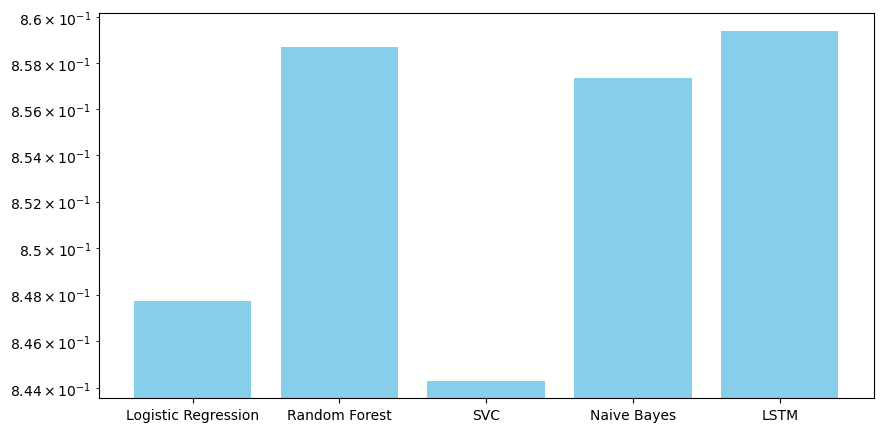

In [65]:
import matplotlib.pyplot as plt

# Avaliações dos modelos
models = ['Logistic Regression', 'Random Forest', 'SVC', 'Naive Bayes', 'LSTM'] 
accuracies = [accuracy_logistic, accuracy_random_forest, accuracy_svc, accuracy_naive_bayes, accuracy_lstm]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')    

# numeros muito proximos, vamos usar escala logaritmica
plt.yscale('log')


Como podemos ver, os modelos são muito próximos, consegui uma melhor acurácia com o modelo LSTM, mas a diferença é muito pequena e o custo computacional é muito maior. A limitação da quantidade de dados influencia muito na acurácia de modelos de Deep Learning, e a quantidade de dados que temos é suficiente para modelos tradicionais. o que pode ser uma explicação para a diferença pequena de acurácia. Provavelmente com mais dados o modelo de Deep Learning teria uma vantagem maior. Mas com a quantia atual de dados, os modelos tradicionais são mais eficientes e com total certeza, se fosse feita uma busca de hiperparametros mais refinada na Random Forest, ela poderia superar com folga o LSTM.